In [1]:
# import pandas as pd
# from lfm import Processor, LatentFactorModel

# rating_df = pd.DataFrame({
#     'user_id': [1, 2, 1, 3, 4, 5, 5],
#     'anime_id': [101, 102, 103, 101, 102, 101, 102],
#     'rating': [8, 7, 10, 9, 9, 6, 7]
# })

# anime_df = pd.DataFrame({
#     'anime_id': [101, 102, 103],
#     'English name': ['Naruto', 'One Piece', 'Attack on Titan']
# })

# proc = Processor(rating_df, anime_df)
# train_mat, test_mat = proc.split(test_size=0.2)

# model = LatentFactorModel(n_factors=25, n_epochs=100)
# model.fit(train_mat)
# model.plot_loss()
# model.plot_metrics()
# model.evaluate(test_mat)

In [2]:
import pandas as pd
import numpy as np

from lfm import Processor, LatentFactorModel

In [3]:
rating_df = pd.read_csv('user-filtered.csv')
anime_df = pd.read_csv('anime-filtered.csv')

In [4]:
n = 200_000
rating_df = rating_df.head(n)
anime_df = anime_df.head(n)

In [5]:
proc = Processor(rating_df, anime_df)
train_mat, test_mat = proc.split(test_size=0.25)

In [6]:
model = LatentFactorModel(n_factors=25, n_epochs=15, lr=0.015)
model.fit(train_mat)

Epoch: 100%|██████████| 15/15 [01:05<00:00,  4.38s/it, rmse=2.07, mae=1.53, loss=4.84]


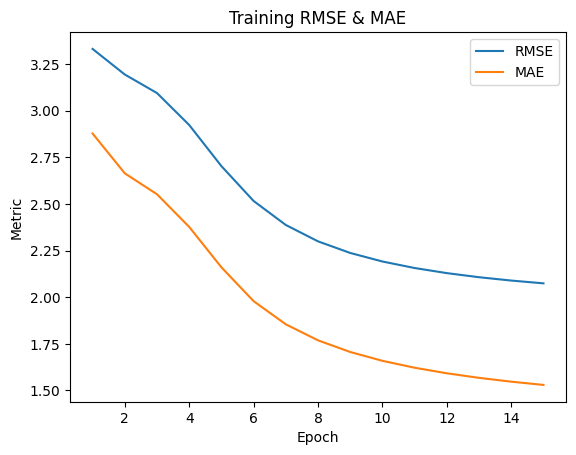

In [7]:
model.plot_metrics()

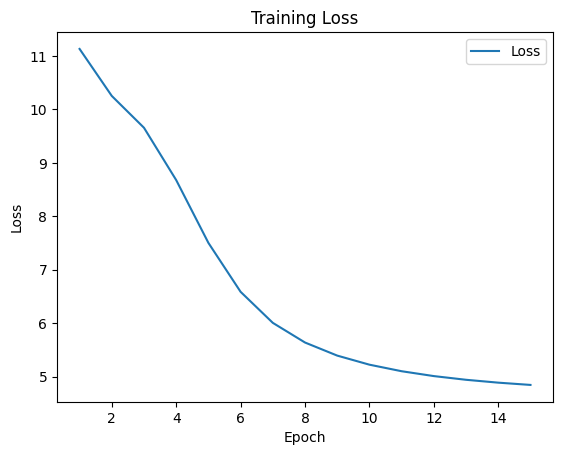

In [8]:
model.plot_loss()

In [9]:
model.evaluate(test_mat)

{'rmse': 3.6593980605889005, 'mae': 2.8231237960039377}

In [39]:
u_idx = 1
items, scores = model.predict_topK(u_idx, K=3)
names = proc.id_to_name_list([proc.anime_df['anime_id'].iloc[i] for i in items])
{print(f'{name}:{np.clip(round(score, 2), 1, 10)}') for name, score in zip (names, scores)}

Android Kikaider:10.0
Spriggan:10.0
The Duchess of Busty Mounds:10.0


{None}

In [11]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(rating_df[["user_id", "anime_id", "rating"]], reader)

surprise_filtrator = SVD(
    n_factors=37,
    biased=True,
)

cross_validate(
    surprise_filtrator,
    data,
    measures=["RMSE", "MAE"],
    cv=5,
    verbose=True,
)
print('-'*10)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.4814  3.4842  3.4921  3.4942  3.5080  3.4920  0.0093  
MAE (testset)     2.7347  2.7368  2.7441  2.7473  2.7646  2.7455  0.0106  
Fit time          0.99    1.04    1.01    1.00    1.02    1.01    0.02    
Test time         0.19    0.18    0.11    0.11    0.18    0.15    0.04    
----------


In [13]:
%timeit model.evaluate(test_mat)

9.51 ms ± 207 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
